### `Kaggle competition #2`   18-Sep-2020 al 20-Sep-2020  
Mónica Villasuso López

## "How much is it?
Predict the price of train tickets "

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from utils import prepare_df
from utils.files import rename_filename, file_exists

# Modelos de ML
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
# Modelos de regresion
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold


# Otros imports
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
import pickle


In [2]:
# GLOBAL VARIABLES 

number_of_processors = -4  # -1 all, -2 all but one, ...
tsize=0.20
seed = 1
normalizar = False

# baseline

In [3]:
#Cargar los datos
df = pd.read_csv("train_set.csv")

In [4]:
#Revisión gráfica de NANs
#msno.matrix(df)

In [5]:
#msno.bar(df)

#### `NO HAY VALORES NANs`

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19452 entries, 0 to 19451
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   origin             19452 non-null  object 
 1   destination        19452 non-null  object 
 2   train_type         19452 non-null  object 
 3   train_class        19452 non-null  object 
 4   fare               19452 non-null  object 
 5   start_date_hour    19452 non-null  int64  
 6   start_date_minute  19452 non-null  int64  
 7   end_date_hour      19452 non-null  int64  
 8   end_date_minute    19452 non-null  int64  
 9   date_day           19452 non-null  int64  
 10  price              19452 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 1.6+ MB


In [7]:
def limpiar_df(df, include_rows=False, elim_outl=False):
    """
    (1) Tipos de columnas
    (2) Eliminar columnas
    """
    df_mod=df.copy()

    #eliminar columnas innecesarias para el análisis
    #df_mod.drop(columns=["start_date_minute", "end_date_minute"], inplace=True)
    return df_mod

In [8]:
#sns.pairplot(df)

Codificar los datos tipo string (usando Label Encoder)

In [9]:
X= limpiar_df(df=df)

In [10]:
X=prepare_df.transformar_df(df=X, aplic_encod=True,aplic_norm=normalizar)

In [11]:
X.columns

Index(['origin', 'destination', 'train_type', 'train_class', 'fare',
       'start_date_hour', 'start_date_minute', 'end_date_hour',
       'end_date_minute', 'date_day', 'price'],
      dtype='object')

In [12]:
#corr = X.corr()

In [13]:
#plt.subplots(figsize=(10, 8)) 
#sns.heatmap(corr,  cmap= "BuPu", square=True,  annot=True)

In [14]:
y = X[["price"]]
X.drop(columns=["price"],inplace=True)


#### 1. Definir X e y

In [15]:
X = X.values
y = y.values

In [16]:
print (X.shape, y.shape)

(19452, 10) (19452, 1)


#### 2. Dividir X_train, X_test, y_train, y_test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize, random_state=seed)

In [18]:
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(15561, 10) (15561, 1) (3891, 10) (3891, 1)


## Asignar modelo, Entrenarlo con X_train y y_train, Predecir con X_test, Sacar métricas, valorar el modelo 

# `Uno a uno`

### PRUEBA BASE (SIN VALIDACION CRUZADA)

In [19]:
model_list=[LinearRegression(), SVR(kernel='rbf'), SVR(kernel='poly'),RandomForestRegressor(), XGBRegressor(n_estimators=1000)   ]

In [19]:
model_list=[LGBMRegressor(n_estimators=5000) ]

In [20]:
for elem in model_list:
    model = elem
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model,  ", Score Test:,", model.score(X_test,y_test)*100,"%", ", RMSE:," , mean_squared_error(y_test, y_pred,squared=False))

LGBMRegressor(n_estimators=5000) , Score Test:, 99.99717773784245 % , RMSE:, 0.0011885415920413983


In [21]:
model

LGBMRegressor(n_estimators=5000)

In [22]:
# Lo ajusto con todos los datos
model.fit (X,y)
y_pred = model.predict(X)
print(model,  " Score TOTAL:", model.score(X,y)*100,"%", " RMSE TOTAL:" , mean_squared_error(y, y_pred,squared=False))
print ("Seed", seed, "Test Size", tsize )

LGBMRegressor(n_estimators=5000)  Score TOTAL: 99.99724722416072 %  RMSE TOTAL: 0.0011671025322528214
Seed 1 Test Size 0.2


### PRUEBA CON REGRESION POLINÓMICA NO LINEAL


In [21]:
polinominal_model = PolynomialFeatures(5) 
X_poly = polinominal_model.fit_transform(X_train,y_train)
model = LinearRegression()

(15561, 10)
(15561, 1)
(15561, 3003)


In [23]:
model.fit(X_poly, y_train)
y_pred = model.predict(X_poly)
print(model, " RMSE (Train):", mean_squared_error(y_train, y_pred,squared=False))

In [25]:
X_test_poly = polinominal_model.fit_transform(X_test) # ** CON TEST **
ytest_pred = model.predict(X_test_poly)  # ** CON TEST **
print(model, " RMSE (Test):", mean_squared_error(y_test, ytest_pred,squared=False))

In [28]:
# Lo ajusto con todos los datos
model.fit (X,y)
y_pred = model.predict(X)
print(model,  " Score Test:", model.score(X,y)*100,"%", " RMSE:" , mean_squared_error(y, y_pred,squared=False))
print ("Seed", seed, "Test Size", tsize )

LinearRegression()  Score Test: 68.2027226038176 %  RMSE: 14.864041375851617
Seed 1 Test Size 0.2


### VALIDACION CRUZADA

In [23]:
# USANDO  VALIDACION CRUZADA
k_fold = RepeatedKFold(n_splits=8, n_repeats=4, random_state=1)
val_score = []
train_score = []
# define the model
model = LGBMRegressor(n_estimators=2000)

for i, (train, val) in enumerate(k_fold.split(X_train)):
    # train the model
    model.fit(X_train[train], y_train[train])
    score_val = model.score(X_train[val], y_train[val])
    val_score.append(score_val)
    score_train = model.score(X_train[train], y_train[train])
    train_score.append(score_train)
    print(np.mean(val_score))
    if np.mean(val_score) >= 0.99997 and len(val_score) > 20:
        #pickle.dump(model, open("model_saved.sav", "wb"))
        print ("Media del score de validacion:", np.mean(val_score))
        print ("Media del score de entrenamiento:", np.mean(train_score))
        print("STOP")
        break

[LightGBM] [Warning] Unknown parameter: warm_start
0.9999138772201089
[LightGBM] [Warning] Unknown parameter: warm_start
0.9999143765646058
[LightGBM] [Warning] Unknown parameter: warm_start
0.999914553668613
[LightGBM] [Warning] Unknown parameter: warm_start
0.9999165426540393
[LightGBM] [Warning] Unknown parameter: warm_start
0.9999059172969232
[LightGBM] [Warning] Unknown parameter: warm_start
0.9998992117635512
[LightGBM] [Warning] Unknown parameter: warm_start
0.9998883005230003
[LightGBM] [Warning] Unknown parameter: warm_start
0.999894661525685
[LightGBM] [Warning] Unknown parameter: warm_start
0.9998999944442439
[LightGBM] [Warning] Unknown parameter: warm_start
0.9998902354375536
[LightGBM] [Warning] Unknown parameter: warm_start
0.9998776530560926
[LightGBM] [Warning] Unknown parameter: warm_start
0.9998813136593964
[LightGBM] [Warning] Unknown parameter: warm_start
0.9998836575359363
[LightGBM] [Warning] Unknown parameter: warm_start
0.9998872960712992
[LightGBM] [Warning] U

Text(0.5, 1.0, 'Scores Log Regr w/Cross Val (30 Splits,4 Repeats)')

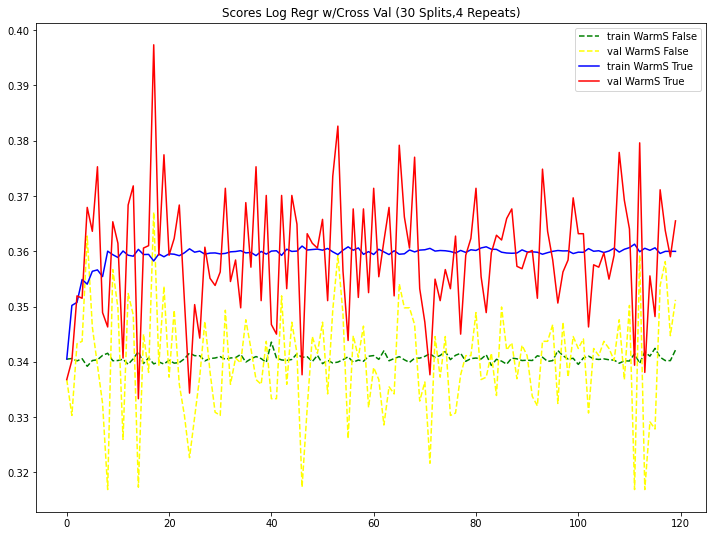

In [35]:
# Visualización general del entrenamiento
plt.figure(figsize = (12,9))
plt.plot(train_score, label="train WarmS False",color='green', linestyle='dashed')
plt.plot(val_score, label="val WarmS False", color="yellow",linestyle='dashed')
#plt.plot(train_scoreT, label="train WarmS True",color = 'b')
#plt.plot(val_scoreT, label="val WarmS True", color="red")
plt.legend()
#plt.title ("Scores Log Regr w/Cross Val (30 Splits,4 Repeats)")

In [33]:
model.score(X_test,y_test)

0.3465496368038741

## Una vez listo el modelo, toca predecir con el dataset de predicción 

In [ ]:
to_pred = pd.read_csv("test_set.csv")

In [33]:
Xt = limpiar_df(df=to_pred)

In [34]:
Xt=prepare_df.transformar_df(df=Xt, aplic_encod=True,aplic_norm=normalizar)

In [35]:
Xt = Xt.values

In [36]:
model

LGBMRegressor(n_estimators=5000)

In [37]:
predictions_submit = model.predict(Xt)

In [ ]:
# OJO: SOLO Si es polinomial Non linear
#predictions_submit= predictions_submit[:,0]

In [38]:
sample = pd.read_csv("sample_submission.csv")

In [39]:
submission = pd.DataFrame({"id": sample["id"], "price": predictions_submit})

In [40]:
submission.to_csv("prueba_17.csv", index = False)

### GUARDAR EL MODELO

In [83]:
def save_model(to_save, filepath):
    try:
        if file_exists(filepath=filepath):
            filepath = rename_filename(filepath=filepath)
        pickle.dump(to_save, open(filepath, 'wb'))
        print("Saved successfully")
        return True, filepath
    except Exception as e:
        print("Error during saving model:\n", e)
        return False, filepath

In [84]:
success, model_filename = save_model(to_save=model, filepath="prueba_14.sav")

Saved successfully


### CARGAR UN MODELO GUARDADO

In [1]:
import pickle

In [2]:
with open('prueba_6.sav', 'rb') as pickle_file:
    model = pickle.load(pickle_file)

In [3]:
model

### PRUEBA CON EL MODELO GUARDADO Y CARGADO

In [22]:
model.fit (X,y)
y_pred = model.predict(X)
print(model,  " Score Test:", model.score(X,y)*100,"%", " RMSE:" , mean_squared_error(y, y_pred,squared=False))

RandomForestRegressor()  Score Test: 99.99651203613432 %  RMSE: 0.1556782447359321
